<a href="https://colab.research.google.com/github/panagiotisl/ai-art-with-stable-diffusion/blob/main/3_Inference_Steps_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers

#@title Login to HuggingFace 🤗

#@markdown You need to accept the model license before downloading or using the Stable Diffusion weights. Please, visit the [model card](https://huggingface.co/runwayml/stable-diffusion-v1-5), read the license and tick the checkbox if you agree. You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work.
# https://huggingface.co/settings/tokens
!mkdir -p ~/.huggingface
HUGGINGFACE_TOKEN = "" #@param {type:"string"}
!echo -n "{HUGGINGFACE_TOKEN}" > ~/.huggingface/token

import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

import torch
from diffusers import DDIMScheduler, StableDiffusionPipeline
from IPython.display import display
import numpy as np

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
g = torch.Generator(device="cuda")

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.2 

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effortless bug reporting copy-paste your error into this form: https://docs.google.com/forms/d/e/1FAIpQLScPB8emS3Thkp66nvqwmjTEgxp8Y9ufuWTzFyr9kJ5AoI47dQ/viewform?usp=sf_link
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:105: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('8013'), PosixPath('//172.28.0.1')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc48301118ce562b961b3c22d803539adc1e0c19/gpu-t4-s-13jukh40bvk0i -

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


The num_inference_steps variable is very important as it specifies the number of iterations that will be executed to remove noise from the initial image (that is entirely made out of random noise). If we use a small value, the result will also look like noise:

  0%|          | 0/2 [00:00<?, ?it/s]

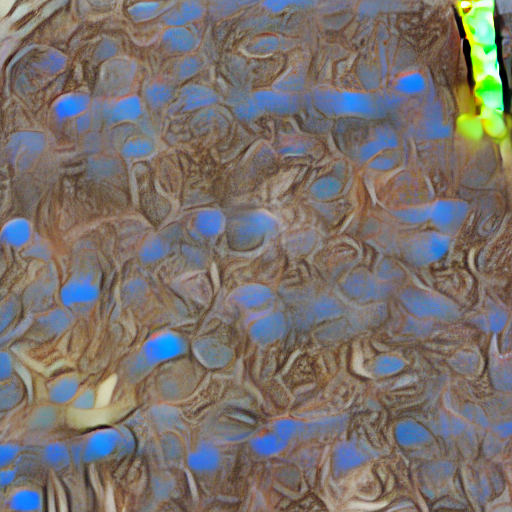

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 2
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

When we slightly increase this value some elements in the image begin to appear:

  0%|          | 0/3 [00:00<?, ?it/s]

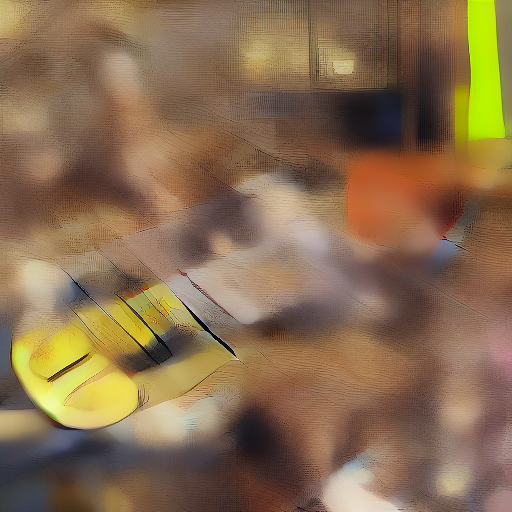

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 3
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

After just five steps we have a result that has removed large parts of the noise. However, the image is not aesthetically pleasing.

  0%|          | 0/5 [00:00<?, ?it/s]

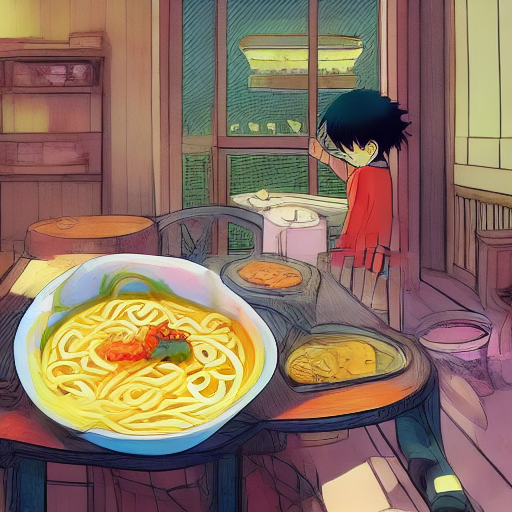

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 5
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

With 10 steps we have a pretty good result that can be further improved of course.

  0%|          | 0/10 [00:00<?, ?it/s]

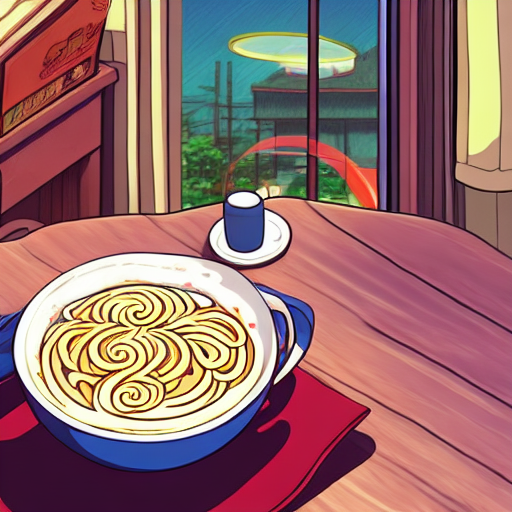

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 10
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

The next examples sets num_inference_steps = 20

  0%|          | 0/20 [00:00<?, ?it/s]

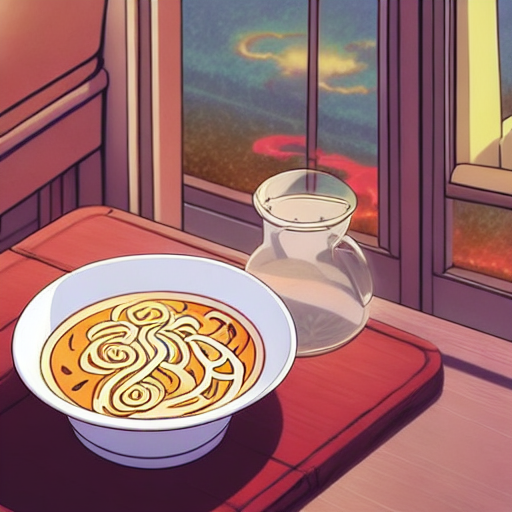

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 20
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

Here we set num_inference_steps = 30

  0%|          | 0/30 [00:00<?, ?it/s]

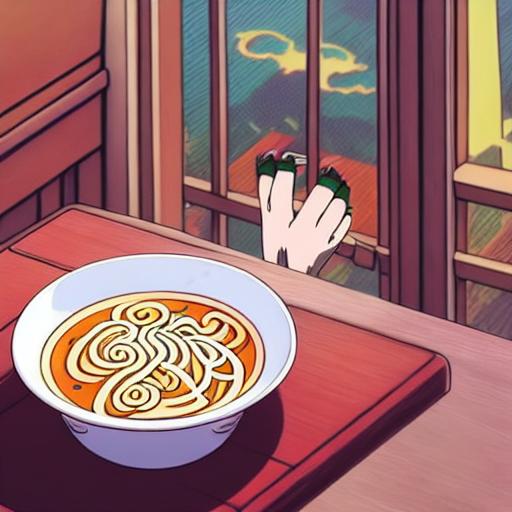

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 30
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

Here we set num_inference_steps = 40

  0%|          | 0/40 [00:00<?, ?it/s]

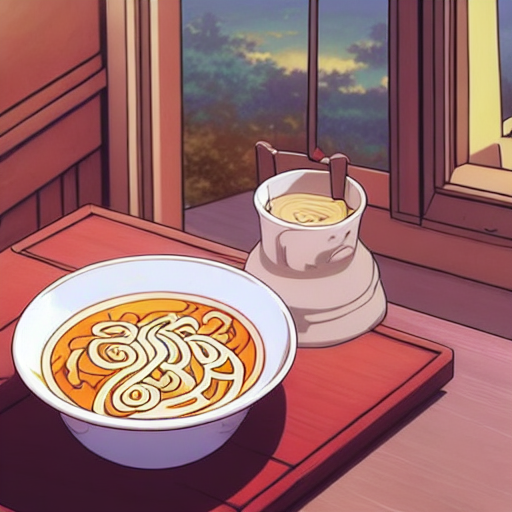

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 40
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

Here we set num_inference_steps = 50

  0%|          | 0/50 [00:00<?, ?it/s]

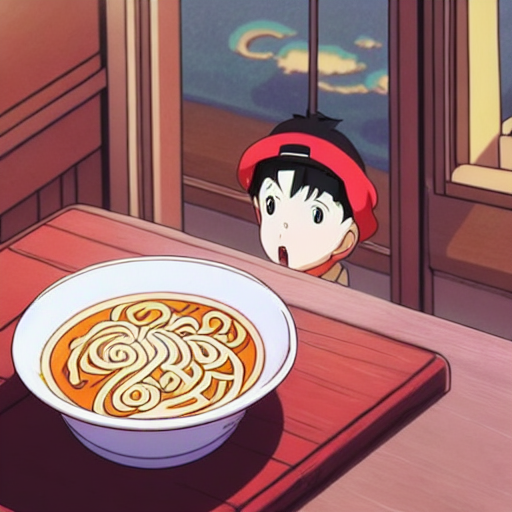

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 50
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)

And finally we set num_inference_steps = 70

  0%|          | 0/70 [00:00<?, ?it/s]

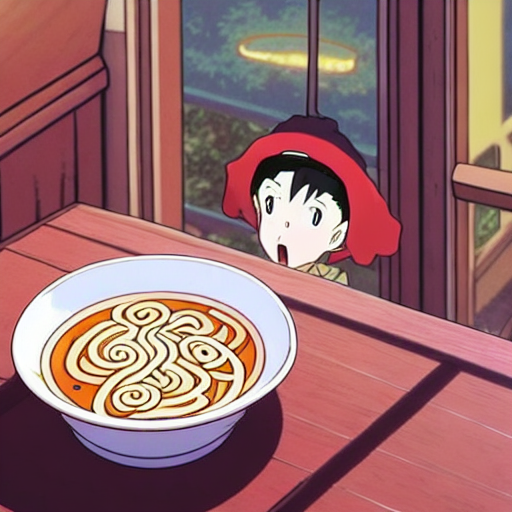

In [ ]:
prompt = "cup of hot noodles on a table, anime, Digital 2D, animated by Kyoto Animation, Studio Ghibli, Miyazaki, AKIRA art style, beautiful, gorgeous, dramatic lighting, rule of thirds, perfect composition"#@param {type:"string"}
negative_prompt = "multiple cups, man, woman, people, frame, border, bad quality, error, blurry, blurred, high contrast"
num_samples = 1
guidance_scale = 12
num_inference_steps = 70
height = 512
width = 512
seed = 27

g.manual_seed(seed)
images = pipe(prompt=prompt,
               num_inference_steps=num_inference_steps,
               guidance_scale= guidance_scale,
               generator=g).images

for img in images:
    display(img)